Use this file as a template to copy and build notebooks

In [1]:
#@title Mount drive and load libraries
import os
from google.colab import drive
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

drive.mount('/content/drive/')
path = '/content/drive/MyDrive/msc-project-mbalmf01/'
os.chdir(path)

Mounted at /content/drive/


In [ ]:
tensor_df = pd.read_csv('/content/drive/MyDrive/msc-project-mbalmf01/all_paired/230809_ablang_tensor_10000.csv', index_col=0)
df = pd.read_csv('/content/drive/MyDrive/msc-project-mbalmf01/all_paired/230716_human_paired_seqs.csv', dtype={'Run':np.str_}, index_col=0)
test = pd.read_csv('/content/drive/MyDrive/msc-project-mbalmf01/all_paired/230810_ablang_tensor_test_set.csv', index_col=0)
test2 = pd.read_csv('/content/drive/MyDrive/msc-project-mbalmf01/all_paired/230810_ablang_tensor_test_set2.csv', index_col=0)

In [38]:
# Assume embeddings is your matrix and labels is your label array
embeddings = pd.concat([tensor_df.iloc[:,1:-1], test.iloc[:,:-1]])
labels = df['v_call_heavy'].apply(lambda x: x.split('*')[0]).iloc[:11000]

#for the test set
test_embeddings = test2.iloc[:,:-1]
test_labels = df['v_call_heavy'].apply(lambda x: x.split('*')[0]).iloc[12000:13000]

#one-hot encode the labels
#Convert categorical labels to numeric labels
label_encoder = LabelEncoder()

labels = label_encoder.fit_transform(labels)
test_labels = label_encoder.fit_transform(test_labels)

num_classes = len(np.unique(labels))
test_num_classes = len(np.unique(test_labels))

labels_encoded = to_categorical(labels, num_classes=num_classes)
test_labels_encoded = to_categorical(test_labels, num_classes=num_classes)

In [39]:
#Split data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(embeddings, labels_encoded, test_size=0.3, random_state=42)

def build_model(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = build_model(X_train.shape[1], num_classes)

#Define callbacks (e.g., early stopping) if needed
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
241/241 [==============================] - 5s 16ms/step - loss: 1.4498 - accuracy: 0.6264 - val_loss: 0.1433 - val_accuracy: 0.9770
Epoch 2/10
241/241 [==============================] - 3s 13ms/step - loss: 0.1968 - accuracy: 0.9479 - val_loss: 0.0472 - val_accuracy: 0.9882
Epoch 3/10
241/241 [==============================] - 3s 11ms/step - loss: 0.0909 - accuracy: 0.9742 - val_loss: 0.0290 - val_accuracy: 0.9918
Epoch 4/10
241/241 [==============================] - 3s 11ms/step - loss: 0.0647 - accuracy: 0.9825 - val_loss: 0.0150 - val_accuracy: 0.9988
Epoch 5/10
241/241 [==============================] - 3s 11ms/step - loss: 0.0485 - accuracy: 0.9871 - val_loss: 0.0130 - val_accuracy: 0.9976
Epoch 6/10
241/241 [==============================] - 4s 18ms/step - loss: 0.0404 - accuracy: 0.9887 - val_loss: 0.0189 - val_accuracy: 0.9933
Epoch 7/10
241/241 [==============================] - 5s 22ms/step - loss: 0.0378 - accuracy: 0.9883 - val_loss: 0.0131 - val_accuracy: 0.9967

104/104 [==============================] - 0s 3ms/step
Accuracy: 0.9990909090909091

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       130
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        33
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00        64
           6       0.83      1.00      0.91         5
           7       1.00      1.00      1.00       127
           8       1.00      1.00      1.00        72
           9       1.00      1.00      1.00        35
          10       1.00      1.00      1.00        77
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        93
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00       101
          15       1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


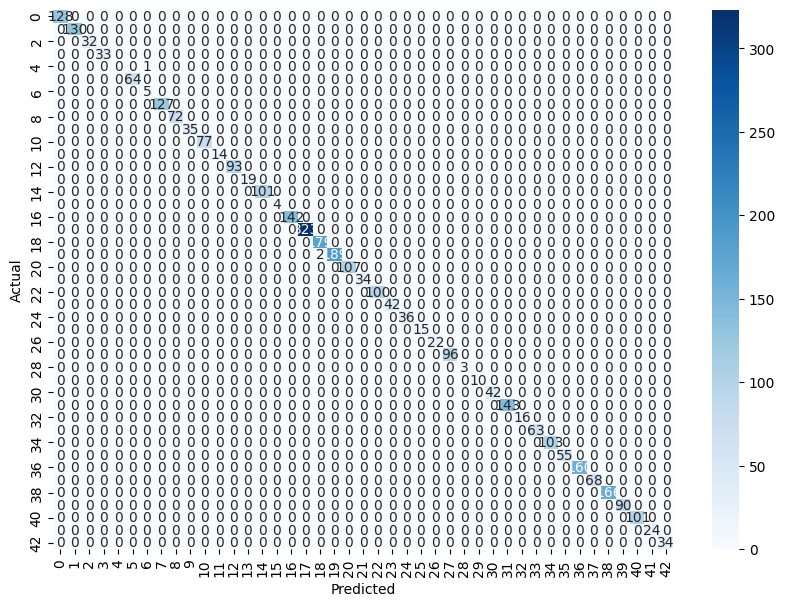

In [36]:
# Predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Basic Metrics
print("Accuracy:", accuracy_score(y_true_classes, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes, zero_division=1))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
y_pred = model.predict(test_embeddings)

32/32 [==============================] - 0s 3ms/step


In [42]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels_encoded, axis=1)

# Basic Metrics
print("Accuracy:", accuracy_score(y_true_classes, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes, zero_division=1))

Accuracy: 0.089

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        11
           4       1.00      0.00      0.00        21
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        33
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        19
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        29
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        29
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00        40
          16       0.00      0.00      0

In [27]:
test_labels

array([35, 16, 38, 36,  1, 19, 35, 26, 38, 40, 20, 35,  0,  6,  9, 38, 17,
       34, 19, 19,  0, 17,  1, 17, 39, 15, 13, 16, 32,  9,  4, 37, 15, 16,
        2, 37, 33, 16,  9, 35, 15, 41, 37,  0, 22, 35, 35,  2, 16, 11, 19,
       34, 36, 37, 11, 17, 16, 11, 41, 19, 30, 32, 30, 37,  1,  0, 32, 30,
       39,  6, 30, 33,  4, 18, 30,  6, 39, 21, 17, 22, 26,  4, 16, 15, 34,
        6,  0, 37, 20, 35,  4, 16, 13, 16, 31, 39, 31, 20,  1, 18, 13, 34,
       13, 16,  1, 34,  9, 12, 20,  9, 36, 19, 29,  0, 16, 15, 19, 37, 37,
        6, 37, 14, 30, 15, 35, 37, 11, 17, 16, 16, 21,  7,  6, 16, 16, 34,
       21, 36,  7,  8,  7,  7,  6, 19, 33, 16,  1, 35, 15, 35, 37, 13, 16,
       19, 37, 11, 21, 35, 16, 16,  6, 13, 11, 26, 18, 16, 17, 21, 18, 16,
       16, 37, 23,  9, 12, 16,  0, 34,  1, 41, 16, 17, 18, 32, 16,  6, 21,
       26,  0, 39, 19,  0, 37,  9,  6, 16, 33,  1, 37, 17, 38, 30, 38,  6,
       39, 33, 33, 16, 15,  6, 36,  7, 37,  3,  1,  1, 37, 15,  2, 26,  4,
       22,  9, 34, 18,  1